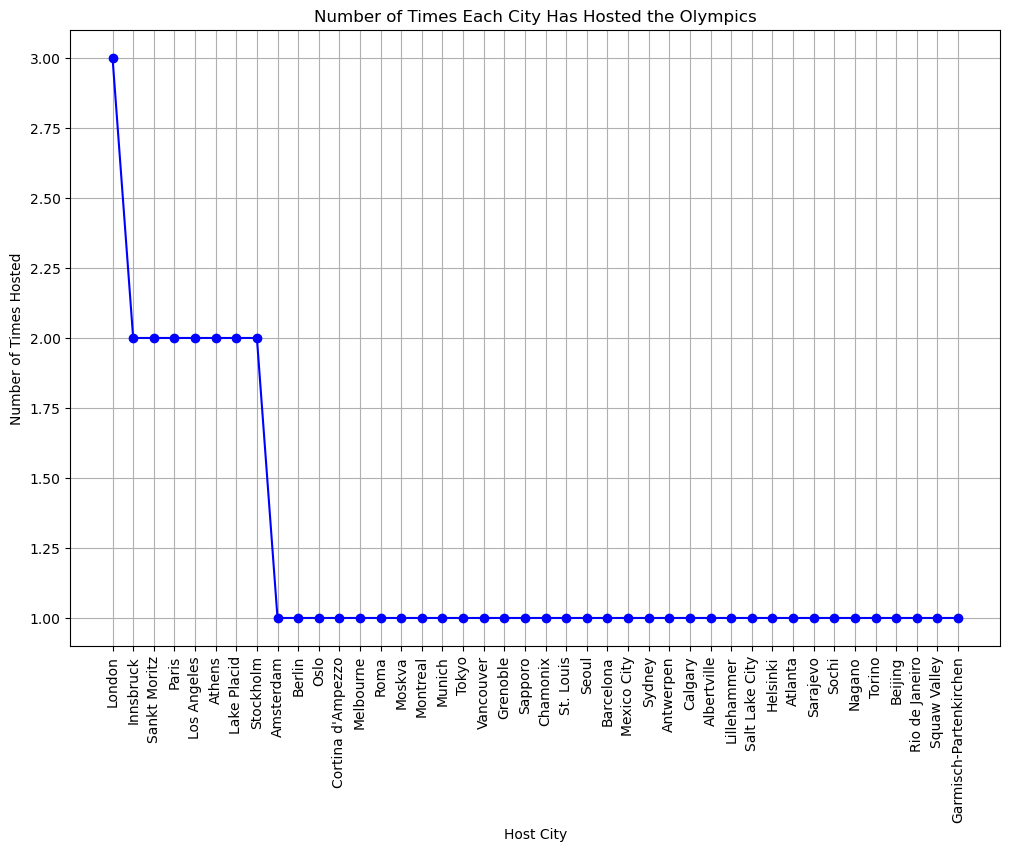

The city that has hosted the most Olympics is London, hosting 3 times.


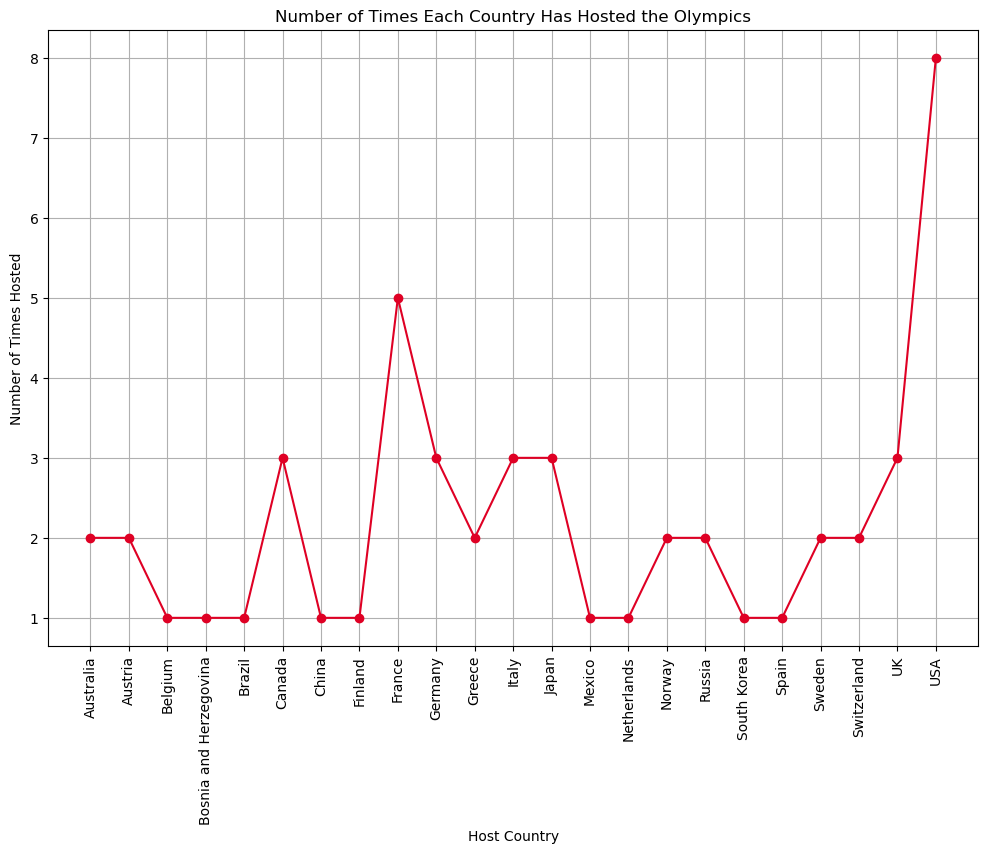

Host Country
Australia                 2
Austria                   2
Belgium                   1
Bosnia and Herzegovina    1
Brazil                    1
Canada                    3
China                     1
Finland                   1
France                    5
Germany                   3
Greece                    2
Italy                     3
Japan                     3
Mexico                    1
Netherlands               1
Norway                    2
Russia                    2
South Korea               1
Spain                     1
Sweden                    2
Switzerland               2
UK                        3
USA                       8
Name: count, dtype: int64


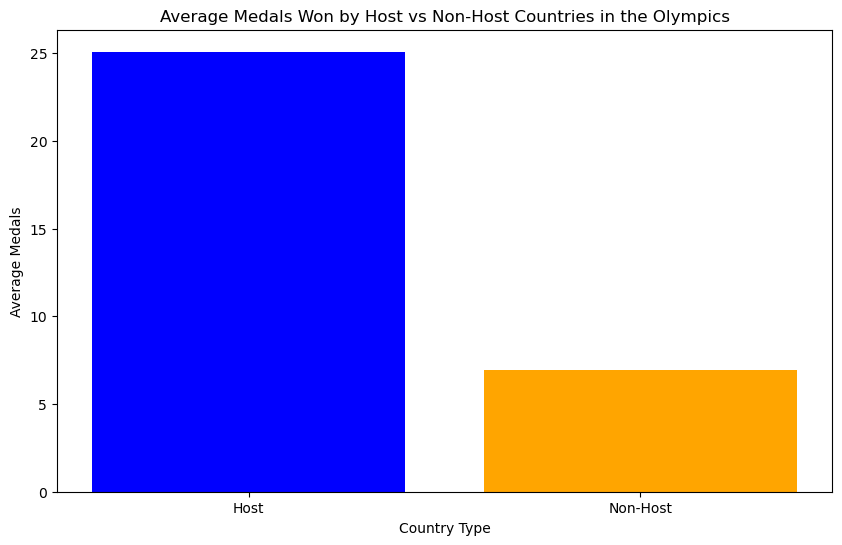

Average medals won by host countries: 25.09
Average medals won by non-host countries: 6.93


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/kamalova/Desktop/April BootCamp/Project 1 /Resources/dataset_olympics.csv'  # Replace with your file path
df_new = pd.read_csv(file_path)

# Normalize city names to handle any inconsistencies
city_replacements = {
    'Athina': 'Athens',
    # Add any other necessary replacements here
}

df_new['City'] = df_new['City'].replace(city_replacements)

# Exclude the 1906 Intercalated Games
df_new = df_new[df_new['Year'] != 1906]

# Drop duplicate rows based on 'Year' and 'City' to ensure each game is counted only once per city
unique_games = df_new[['Year', 'City']].drop_duplicates()

# Count the number of unique games hosted by each city
host_city_counts = unique_games['City'].value_counts()

# Plot the data for the number of times each city has hosted the Olympics
plt.figure(figsize=(12, 8))
plt.plot(host_city_counts.index, host_city_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Host City')
plt.ylabel('Number of Times Hosted')
plt.title('Number of Times Each City Has Hosted the Olympics')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Print the city that has hosted the most Olympics
most_hosted_city = host_city_counts.idxmax()
most_hosted_count = host_city_counts.max()

print(f"The city that has hosted the most Olympics is {most_hosted_city}, hosting {most_hosted_count} times.")

# Correct mapping of host cities to host countries
host_countries_corrected = {
    'Barcelona': 'Spain', 'London': 'UK', 'Antwerpen': 'Belgium', 'Paris': 'France', 'Calgary': 'Canada',
    'Albertville': 'France', 'Lillehammer': 'Norway', 'Los Angeles': 'USA', 'Salt Lake City': 'USA',
    'Helsinki': 'Finland', 'Lake Placid': 'USA', 'Sydney': 'Australia', 'Atlanta': 'USA', 'Stockholm': 'Sweden',
    'Sochi': 'Russia', 'Nagano': 'Japan', 'Torino': 'Italy', 'Beijing': 'China', 'Rio de Janeiro': 'Brazil',
    'Athens': 'Greece', 'Squaw Valley': 'USA', 'Innsbruck': 'Austria', 'Sarajevo': 'Bosnia and Herzegovina',
    'Mexico City': 'Mexico', 'Munich': 'Germany', 'Seoul': 'South Korea', 'Berlin': 'Germany', 'Oslo': 'Norway',
    "Cortina d'Ampezzo": 'Italy', 'Melbourne': 'Australia', 'Roma': 'Italy', 'Amsterdam': 'Netherlands',
    'Montreal': 'Canada', 'Moskva': 'Russia', 'Tokyo': 'Japan', 'Vancouver': 'Canada', 'Grenoble': 'France',
    'Sapporo': 'Japan', 'Chamonix': 'France', 'St. Louis': 'USA', 'Sankt Moritz': 'Switzerland',
    'Garmisch-Partenkirchen': 'Germany'
}

# Apply the corrected host country mapping
host_countries_count = unique_games[['Year', 'City']].drop_duplicates()
host_countries_count['Host Country'] = host_countries_count['City'].map(host_countries_corrected)

# Correct any missing mappings specifically for London and others
host_countries_count.loc[host_countries_count['City'] == 'London', 'Host Country'] = 'UK'
host_countries_count.loc[host_countries_count['City'] == 'Athens', 'Host Country'] = 'Greece'

# Count how many times each country has hosted the Olympics
host_country_counts_corrected = host_countries_count['Host Country'].value_counts()

# Sort the index for a proper line graph
host_country_counts_corrected = host_country_counts_corrected.sort_index()

# Plot the data using a line graph to ensure all countries are displayed clearly
plt.figure(figsize=(12, 8))
plt.plot(host_country_counts_corrected.index, host_country_counts_corrected.values, marker='o', linestyle='-', color='#DF0024')
plt.xlabel('Host Country')
plt.ylabel('Number of Times Hosted')
plt.title('Number of Times Each Country Has Hosted the Olympics')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

print(host_country_counts_corrected)

# Analyze the impact of hosting on medal counts
# Extract relevant columns and preprocess the data
df_medals = df_new[['Year', 'Team', 'Medal']].copy()

# Identify host countries for each Olympic year
host_countries = {
    1960: 'Italy', 1964: 'Japan', 1968: 'Mexico', 1972: 'Germany', 1976: 'Canada',
    1980: 'Soviet Union', 1984: 'USA', 1988: 'South Korea', 1992: 'Spain', 1996: 'USA',
    2000: 'Australia', 2004: 'Greece', 2008: 'China', 2012: 'UK', 2016: 'Brazil', 2020: 'Japan'
}

# Add a 'Host' column to indicate whether the team was a host country in that year
df_medals['Host'] = df_medals.apply(lambda row: 'Host' if row['Team'] == host_countries.get(row['Year']) else 'Non-Host', axis=1)

# Filter out rows where 'Medal' is NaN (i.e., no medal won)
df_medals = df_medals.dropna(subset=['Medal'])

# Group the data by 'Year', 'Team', and 'Host' to get the total medals won for each year by each country
medal_counts_by_country = df_medals.groupby(['Year', 'Team', 'Host']).size().reset_index(name='Medal Count')

# Calculate the average medals won by host and non-host countries
avg_medals_by_host_status = medal_counts_by_country.groupby('Host')['Medal Count'].mean().reset_index()
avg_medals_by_host_status['Medal Count'] = avg_medals_by_host_status['Medal Count'].round(2)

# Plot the data for average medals won by host vs. non-host countries
plt.figure(figsize=(10, 6))
plt.bar(avg_medals_by_host_status['Host'], avg_medals_by_host_status['Medal Count'], color=['blue', 'orange'])
plt.xlabel('Country Type')
plt.ylabel('Average Medals')
plt.title('Average Medals Won by Host vs Non-Host Countries in the Olympics')
plt.show()

# Display the results
print("Average medals won by host countries:", avg_medals_by_host_status.loc[avg_medals_by_host_status['Host'] == 'Host', 'Medal Count'].values[0])
print("Average medals won by non-host countries:", avg_medals_by_host_status.loc[avg_medals_by_host_status['Host'] == 'Non-Host', 'Medal Count'].values[0])
